## kNN (k nearest neighbours) Algorithm

Based on the independent variables, kNN finds the similarity between new data points and old data points.
KNN can be used for both classification and regression predictive problems. However, it is more widely used in classification problems in the industry.

In [15]:
# import packages
import pandas as pd
import numpy as np

# to plot within notebook
import matplotlib.pyplot as plt
%matplotlib inline

# setting figure size
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 20, 10

# for normalizing data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))

# read the file
df = pd.read_csv('NSE-TATAGLOBAL.csv')

# print the head
df.head()


,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-12-17,212.80,213.40,209.50,210.00,210.05,1303397.0,2740.81
1,2018-12-14,212.00,213.35,210.00,213.30,212.35,860565.0,1822.86
2,2018-12-13,213.35,215.70,210.25,212.90,212.40,1196911.0,2552.82
3,2018-12-12,203.15,213.90,203.00,212.65,212.95,1755046.0,3695.14
4,2018-12-11,195.00,203.80,195.00,202.85,202.85,1818568.0,3635.49


In [16]:
# setting index as date
df['Date'] = pd.to_datetime(df.Date, format='%Y-%m-%d')
df.index = df['Date']


In [17]:
# sorting
data = df.sort_index(ascending=True, axis=0)


In [18]:
# creating a separate dataset
new_data = pd.DataFrame(index=range(0, len(df)), columns=['Date', 'Close'])

for i in range(0, len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]


In [19]:
total = len(new_data)
cut_length = 1687
remain = total - cut_length
total, cut_length, remain


(2087, 1687, 400)

In [20]:
year, month, week, day, day_of_week, day_of_year = [], [], [], [], [], []
Is_month_end, Is_month_start, Is_quarter_end, Is_quarter_start, Is_year_end, Is_year_start = [], [], [], [], [], []
date = new_data['Date'].values
for ts in date:
    dt_year, dt_week, dt_weekday = ts.isocalendar()
    year.append(dt_year)
    month.append(ts.month)
    week.append(dt_week)
    day.append(ts.day)
    day_of_week.append(dt_weekday)
    day_of_year.append(ts.timetuple().tm_yday)
    Is_month_end.append(ts.is_month_end)
    Is_month_start.append(ts.is_month_start)
    Is_quarter_end.append(ts.is_quarter_end)
    Is_quarter_start.append(ts.is_quarter_start)
    Is_year_end.append(ts.is_year_end)
    Is_year_start.append(ts.is_year_start)

print(len(year), len(month), len(week), len(day), len(day_of_week), len(day_of_year), len(Is_month_end),
      len(Is_month_start), len(Is_quarter_end), len(Is_quarter_start), len(Is_year_start), len(Is_year_end))


2087 2087 2087 2087 2087 2087 2087 2087 2087 2087 2087 2087


In [21]:
new_data['Year'] = year
new_data['Month'] = month
new_data['Week'] = week
new_data['Day'] = day
new_data['Dayofweek'] = day_of_week
new_data['Dayofyear'] = day_of_year
new_data['Is_month_end'] = Is_month_end
new_data['Is_month_start'] = Is_month_start
new_data['Is_quarter_end'] = Is_quarter_end
new_data['Is_quarter_start'] = Is_quarter_start
new_data['Is_year_end'] = Is_year_end
new_data['Is_year_start'] = Is_year_start

new_data.drop('Date', axis=1, inplace=True)  # elapsed will be the time stamp


In [22]:
# split into train and validation
train = new_data[:cut_length]
valid = new_data[cut_length:]

new_data.shape, train.shape, valid.shape


((2087, 13), (1687, 13), (400, 13))

In [23]:
x_train = train.drop('Close', axis=1)
y_train = train['Close']
x_valid = valid.drop('Close', axis=1)
y_valid = valid['Close']


In [24]:
# y_train


In [ ]:
# importing libraries
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))


In [ ]:
# scaling data
x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)
x_valid_scaled = scaler.fit_transform(x_valid)
x_valid = pd.DataFrame(x_valid_scaled)

# using gridsearch to find the best parameter
params = {'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9]}
knn = neighbors.KNeighborsRegressor()
model = GridSearchCV(knn, params, cv=5)

# fit the model and make predictions
model.fit(x_train, y_train)
preds = model.predict(x_valid)


C:\ProgramData\Miniconda3\envs\ML\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype bool, int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Miniconda3\envs\ML\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype bool, int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [ ]:
# rmse
rms = np.sqrt(np.mean(np.power((np.array(y_valid) - np.array(preds)), 2)))
rms


114.43637907697882

C:\ProgramData\Miniconda3\envs\ML\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Miniconda3\envs\ML\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


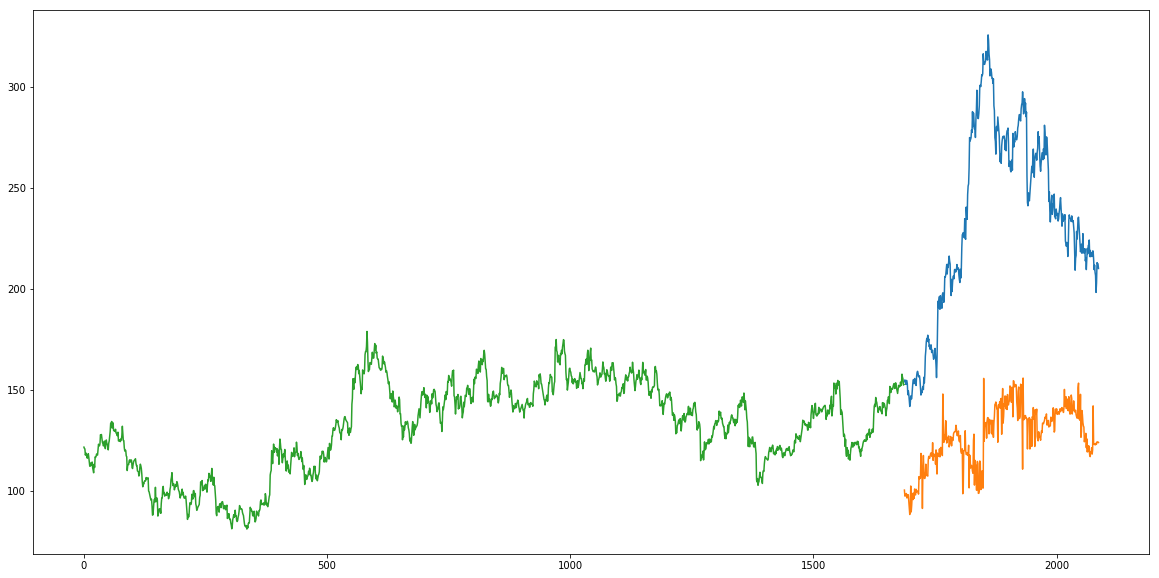

In [ ]:
# plot
valid['Predictions'] = 0
valid['Predictions'] = preds
plt.plot(valid[['Close', 'Predictions']])
plt.plot(train['Close'])
